<h1><center>1. Analyzing Microbial Interactions.</h1>

<h3><H3>Distribution and Correlation of Fungi, Bacteria, Archaea, and Viruses using QUBIC2.</h3>

>Understanding the complex interactions between fungi, bacteria, archaea, and viruses is essential for unraveling the dynamics of microbial ecosystems. In this study, we aim to investigate the distribution and correlation patterns of these microorganisms, ultimately generating informative graphs to shed light on their relationships. 

>To accomplish this, we employ the QUBIC2 software, a powerful tool for qualitative biclustering and network analysis. QUBIC2 allows us to identify coherent subsets of microorganisms exhibiting shared qualitative characteristics and construct co-expression networks based on their expression patterns. Additionally, QUBIC2 provides features such as heatmap visualization, query-based biclustering, bicluster expansion, and comparison of biclusters obtained through different algorithms or parameters. 

>By leveraging the capabilities of QUBIC2, we anticipate gaining valuable insights into the intricate microbial interactions within our dataset. This research will contribute to a deeper understanding of microbial ecology and pave the way for future investigations into the functional associations and ecological roles of these microorganisms.

* <h5> Citation

In [ ]:
# cite
citation("QUBIC")

<h3>Libraries and Packages

* <h5> Install

In [ ]:
# install QUBIC
if (!requireNamespace("BiocManager", quietly = TRUE))
install.packages("BiocManager")
BiocManager::install("QUBIC")

In [ ]:
# Packages to install
install.packages("rlang")
install.packages('pheatmap')
install.packages("fields")
install.packages("qgraph")
install.packages("biclust")
install.packages("readr")
install.packages('dplyr')

# # install QUBIC from github
# install.packages("devtools")
# devtools::install_github("zy26/QUBIC")

* <h5> Load

In [2]:
# load packages
library('QUBIC')
library('fields')
library('qgraph')
library('readr')
library('gplots')
library('pheatmap')
library('ggplot2')
library('dplyr')
library('RColorBrewer')

<h2><center> 2. Data

* <h5>Bacteria

In [ ]:
# import CSV file and specify ASV column to use as row names
Bacteria_df <- read.csv("./data/Bacteria.csv", row.names="ASV")


* <h5> Archaea

In [3]:
# import CSV file and specify ASV column to use as row names
df_Archaea <- read.csv("./data/Archaea.csv", row.names="ASV")


* <h5>Fungus

In [ ]:
# import CSV file and specify ASV column to use as row names
df <- read.csv("./data/fungus.csv", row.names="ASV")

* <h5> Virus

In [ ]:
# import CSV file and specify ASV column to use as row names
df_virus <- read.csv("./data/virus.csv")

In [ ]:
head(df)

<h3> Data Preparation.

In [4]:
# drop taxanomic columns
df <- subset(df_Archaea, select = -c(Domain, Kingdom, Phylum, Class, Order, Family, Species, Genus, Percent))


In [5]:
# Smple conditions from the data
condition_1 <- c('C1', 'C2', 'C4', 'C5', 'C6', 'C7', 'P1', 'P11', 'P12', 'pm14', 'pm15', 'pm2', 'pm3', 'pm4', 'pm5', 'pm6', 'pm7', 'pm8', 'pm9')
condition_2 <- c('pm1', 'pm11', 'pm12', 'pm13', 'pm14', 'pm15', 'pm2','pm3', 'pm4', 'pm5', 'pm6', 'pm7', 'pm8', 'pm9')
condition_3 <- c('C1', 'C2', 'C4', 'C5', 'C6', 'C7')
condition_4 <- c('P1', 'P11', 'P12', 'P13', 'P14', 'P15', 'P2', 'P3', 'P4', 'P6', 'P7','P8')
condition_5 <- c('PC1', 'PC10', 'PC11', 'PC12', 'PC13', 'PC14', 'PC15', 'PC2','PC3', 'PC4', 'PC5', 'PC6', 'PC9')
condition_6 <- c('c10', 'c11', 'c12', 'c13', 'c14','c15', 'c8', 'c9')

# select columns to use
new_df <- df[condition_2]

# normalise the resulting df
normalized_df <- as.data.frame(scale(new_df))

# convert to matrix
my_data <- data.matrix(normalized_df)

# preview data
head(my_data)

,SUM,C1,C2,C4,C5,C6,C7,P1,P11,P12,⋯,pm14,pm15,pm2,pm3,pm4,pm5,pm6,pm7,pm8,pm9
ASV143,1.46459154,-0.05435566,-0.03181576,-0.1294279,2.8181457,-0.1487628,-0.1497569,-0.05155608,-0.1347778,-0.07533544,⋯,-0.04919378,-0.04555803,-0.0448989,-0.06110254,17.25093670,0.09722654,-0.08032454,0.16206169,-0.0726999,-0.05955876
ASV92,0.47174651,-0.05435566,-0.03181576,-0.1294279,1.4756765,-0.1163549,-0.1497569,-0.05155608,-0.1347778,-0.07533544,⋯,-0.04919378,-0.04555803,-0.0448989,-0.06110254,7.88095911,-0.03153027,-0.08032454,-0.06174434,-0.0726999,0.68714806
ASV487,-0.09796158,-0.05435566,-0.03181576,-0.1294279,-0.1549668,-0.1487628,-0.1497569,-0.05155608,-0.1347778,-0.07533544,⋯,-0.04919378,-0.04555803,-0.0448989,-0.06110254,-0.06880006,-0.03258349,-0.08032454,-0.06174434,-0.0726999,-0.10622793
ASV488,-0.09796158,-0.05435566,-0.03181576,-0.1294279,-0.1549668,-0.1487628,-0.1497569,-0.05155608,-0.1347778,-0.07533544,⋯,-0.04919378,-0.04555803,-0.0448989,-0.06110254,-0.06880006,-0.03258349,-0.08032454,-0.06174434,-0.0726999,-0.10622793
ASV135,20.51157033,-0.05435566,-0.03181576,-0.1294279,-0.1409096,-0.1487628,-0.1497569,-0.05155608,-0.1347778,-0.07533544,⋯,-0.04919378,-0.04555803,-0.0448989,-0.06110254,14.63565645,32.83305302,-0.08032454,24.25851044,-0.0726999,1.18495261
ASV15,0.35474163,-0.02094913,-0.02476652,5.6800236,5.6436569,6.4462495,4.5896751,0.08866878,20.7860603,-0.07533544,⋯,-0.04919378,-0.04555803,-0.0448989,0.06416594,-0.06880006,-0.03258349,-0.08032454,-0.06174434,-0.0726999,-0.10622793


<h3>Discretization.</h3>
Converting continuous variables into discrete or categorical variables, qudiscretize function creates a discrete matrix for a given gene expression matrix.

In [6]:
# Discretization
matrix1 <- qudiscretize(my_data)
head(matrix1)

,SUM,C1,C2,C4,C5,C6,C7,P1,P11,P12,⋯,pm14,pm15,pm2,pm3,pm4,pm5,pm6,pm7,pm8,pm9
ASV143,1,0,0,0,1,-1,-1,0,-1,0,⋯,0,0,0,0,1,1,0,1,0,0
ASV92,1,0,0,-1,1,0,-1,0,-1,0,⋯,0,0,0,0,1,0,0,0,0,1
ASV487,-1,0,1,-1,-1,-1,-1,0,-1,0,⋯,0,0,0,0,0,1,0,0,0,-1
ASV488,-1,0,1,-1,-1,-1,-1,0,-1,0,⋯,0,0,0,0,0,1,0,0,0,-1
ASV135,1,0,0,0,-1,-1,-1,0,0,0,⋯,0,0,0,0,1,1,0,1,0,1
ASV15,1,0,0,1,1,1,1,1,1,0,⋯,0,0,0,1,0,0,0,0,0,-1


* -1: represents a category or level that is considered low or negative. 

* 0: represents a category or level that is neutral or has no effect. 

* 1: represents a category or level that is considered high or positive. 

<h2><center>5. Statistical Analysis

In [7]:
# Convert the matrix into a data frame
df <- as.data.frame(my_data)

# Remove the first row and first column (assuming they contain row names and column names)
df <- df[-1, -1]

# Create unique row names by adding an identifier
rownames(df) <- paste0("ASV_", seq_len(nrow(df)))

# Perform ANOVA on the data
anova_result <- aov(as.matrix(df) ~ 1)

# Summarize ANOVA results
summary_result <- summary(anova_result)


<h2><center>3. Biclustering.

In [8]:
# QUBIC
system.time(res <- biclust::biclust(my_data, method = BCQU()))

# summary
summary(res)

   user  system elapsed 
  0.674   0.007   0.627 


An object of class Biclust 

call:
	biclust::biclust(x = my_data, method = BCQU())

Number of Clusters found:  35 

Cluster sizes:
                   BC 1 BC 2 BC 3 BC 4 BC 5 BC 6 BC 7 BC 8 BC 9 BC 10 BC 11
Number of Rows:     954  660  684  493  426  914  402  297  413   289   336
Number of Columns:   11   13   12   12   13    6   12   14   10    14    12
                   BC 12 BC 13 BC 14 BC 15 BC 16 BC 17 BC 18 BC 19 BC 20 BC 21
Number of Rows:      287   304   280   324   270   141   143   147   150   112
Number of Columns:    14    13    14    12    14    17    16    15    14    11
                   BC 22 BC 23 BC 24 BC 25 BC 26 BC 27 BC 28 BC 29 BC 30 BC 31
Number of Rows:       58    70    41    26   119    23    71    44    60     9
Number of Columns:    15    11    13    17     3    12     3     3     2     7
                   BC 32 BC 33 BC 34 BC 35
Number of Rows:       10    12    11    12
Number of Columns:     5     4     4     2




* <h5>Cluster Analysis

In [9]:
# Show the biclusters
biclust::bicluster(my_data, res)

,C2,C5,C6,C7,P11,P7,PC3,PC5,PC6,pm13,pm9
ASV487,-0.03181576,-0.1549668,-0.1487628,-0.1497569,-0.1347778,-0.03201935,-0.1092484,-0.1221179,-0.153503,9.6507760,-0.1062279
ASV488,-0.03181576,-0.1549668,-0.1487628,-0.1497569,-0.1347778,-0.03201935,-0.1092484,-0.1221179,-0.153503,9.6507760,-0.1062279
ASV489,-0.03181576,-0.1549668,-0.1487628,-0.1497569,-0.1347778,-0.03201935,-0.1092484,-0.1221179,-0.153503,7.7812349,-0.1062279
ASV490,-0.03181576,-0.1549668,-0.1487628,-0.1497569,-0.1347778,-0.03201935,-0.1092484,-0.1221179,-0.153503,7.7812349,-0.1062279
ASV158,-0.03181576,-0.1549668,-0.1487628,-0.1497569,-0.1347778,-0.03201935,-0.1092484,-0.1221179,-0.153503,3.4189723,-0.1062279
ASV491,-0.03181576,-0.1549668,-0.1487628,-0.1497569,-0.1347778,-0.03201935,-0.1092484,-0.1221179,-0.153503,1.3417045,-0.1062279
ASV492,-0.03181576,-0.1549668,-0.1487628,-0.1497569,-0.1347778,-0.03201935,-0.1092484,-0.1221179,-0.153503,0.9262509,-0.1062279
ASV493,-0.03181576,-0.1549668,-0.1487628,-0.1497569,-0.1347778,-0.03201935,-0.1092484,-0.1221179,-0.153503,0.7185241,-0.1062279
ASV494,-0.03181576,-0.1549668,-0.1487628,-0.1497569,-0.1347778,-0.03201935,-0.1092484,-0.1221179,-0.153503,0.5107973,-0.1062279
ASV301,-0.03181576,-0.1549668,-0.1487628,-0.1497569,-0.1347778,-0.03201935,-0.1092484,-0.1221179,-0.153503,0.3030705,-0.1062279


* <h5> all the biclusters

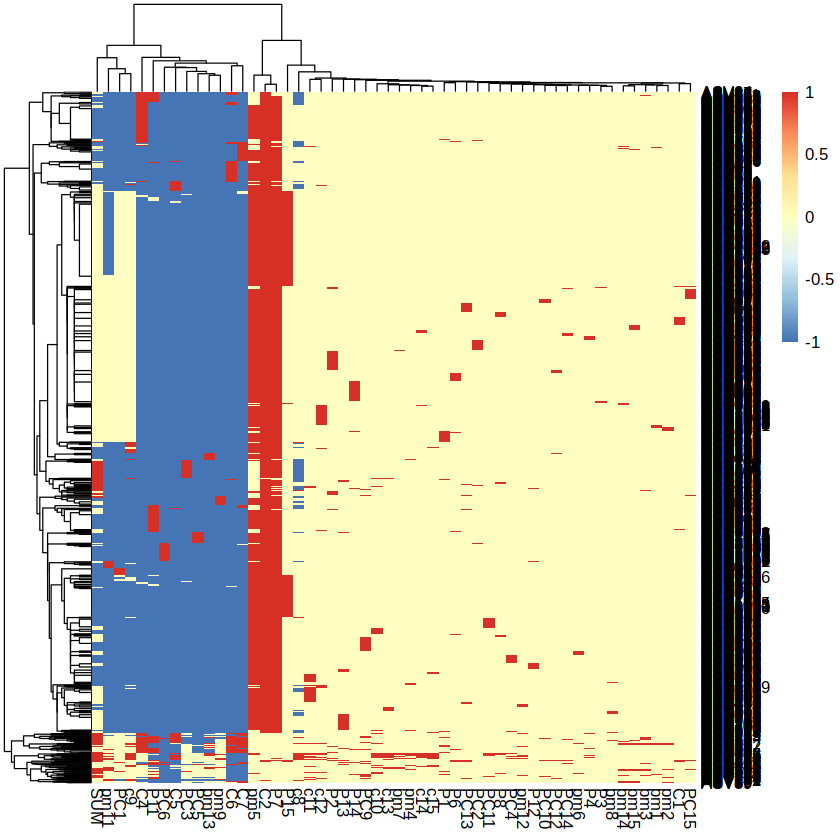

In [10]:
# Create a heatmap of the biclustered matrix
pheatmap(matrix1, cluster_rows = TRUE, cluster_cols = TRUE, width = 16, height = 14)

* <h5> Cluster 2

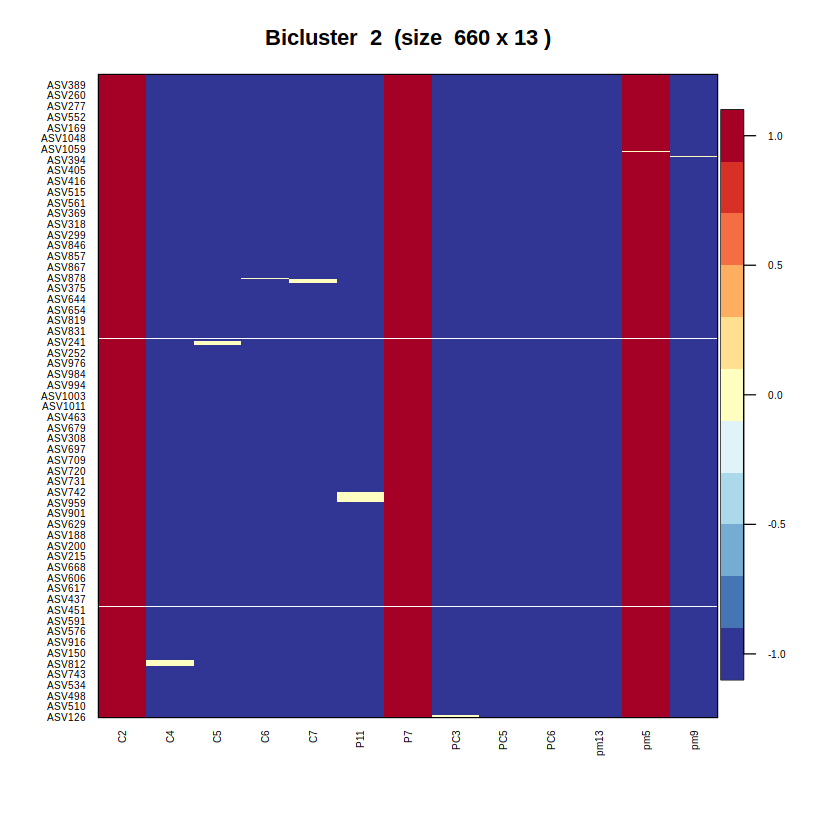

In [11]:
# Draw heatmap for the second bicluster identified in the data
paleta <- colorRampPalette(rev(brewer.pal(11, "RdYlBu")))(11)
par(mar = c(5, 4, 3, 5) + 0.1, mgp = c(0, 1, 0), cex.lab = 1.1, cex.axis = 0.5,
cex.main = 1.1)
quheatmap(matrix1, res, number = 2, showlabel = TRUE, col = paleta)

* <h5> Overlapping Clusters

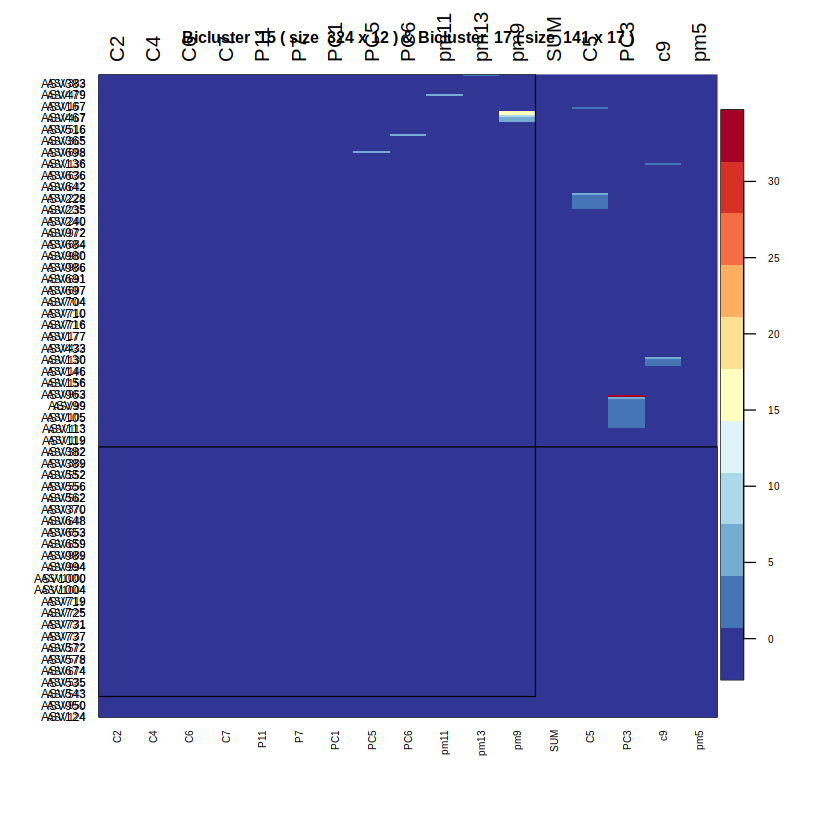

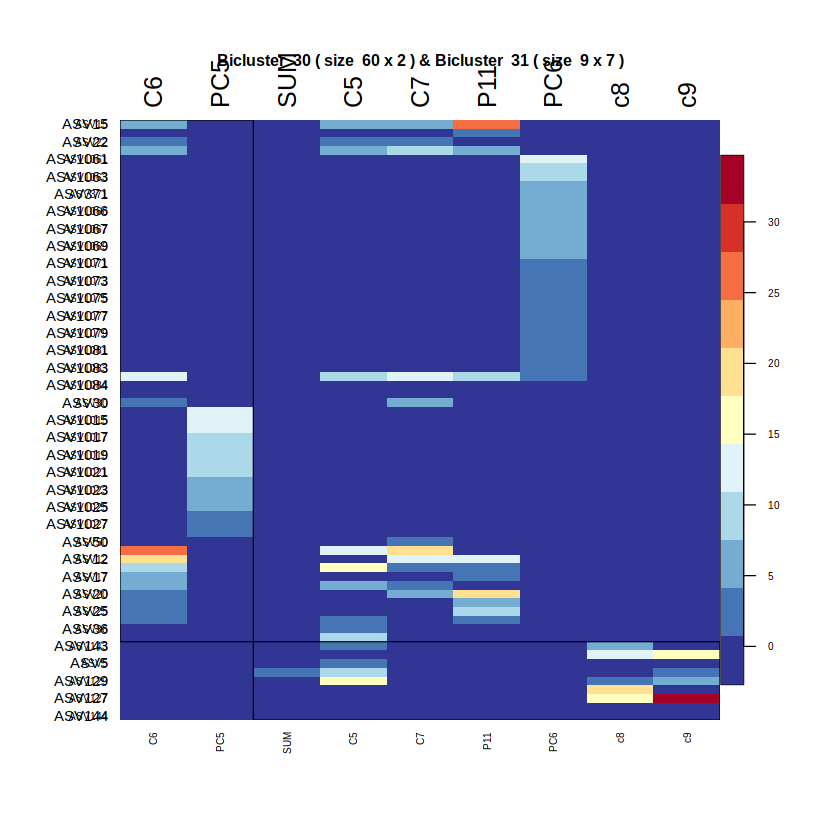

In [17]:
res <- biclust::biclust(my_data, method=BCQU(), verbose = FALSE)
# Draw heatmap for the 2th identified bicluster
par(mar = c(5, 4, 3, 5) + 0.1, mgp = c(0, 1, 3), cex.lab = 1.1, cex.axis = 0.5, cex.main = 1.1)
quheatmap(x = my_data, res, number = c(15, 17), showlabel = TRUE)

# Draw heatmap for the 2th and 3th identified biclusters.
par(mar = c(5, 5, 5, 5), cex.lab = 1.1, cex.axis = 0.5, cex.main = 1.1)
quheatmap(x = my_data, res, number = c(30, 31), showlabel = TRUE)

<h2><center>4. Convert newwork to XGMML

>This function can convert the constructed co-expression networks into XGMML format, which can be used to do further network analysis in Cytoscape, Biomax and JNets.

In [ ]:
# Get all biclusters
net <- qunetwork(my_data, res, group = c(1), method = 'spearman')

# Save the network to a XGMML file
sink('Arcahea_clusters.gr')
qunet2xml(net, minimum = 0.6, color = cbind(grDevices::rainbow(length(net[[2]]) - 1), 'gray'))
sink()

# You can use Cytoscape, Biomax or JNets open file

<h2><center>5. Network Analysis

Create co-expression networks along with their visualization based on identified biclusters in QUBIC. Thre correlation method is Pearson.

* <h5>networks for the identified biclusters.

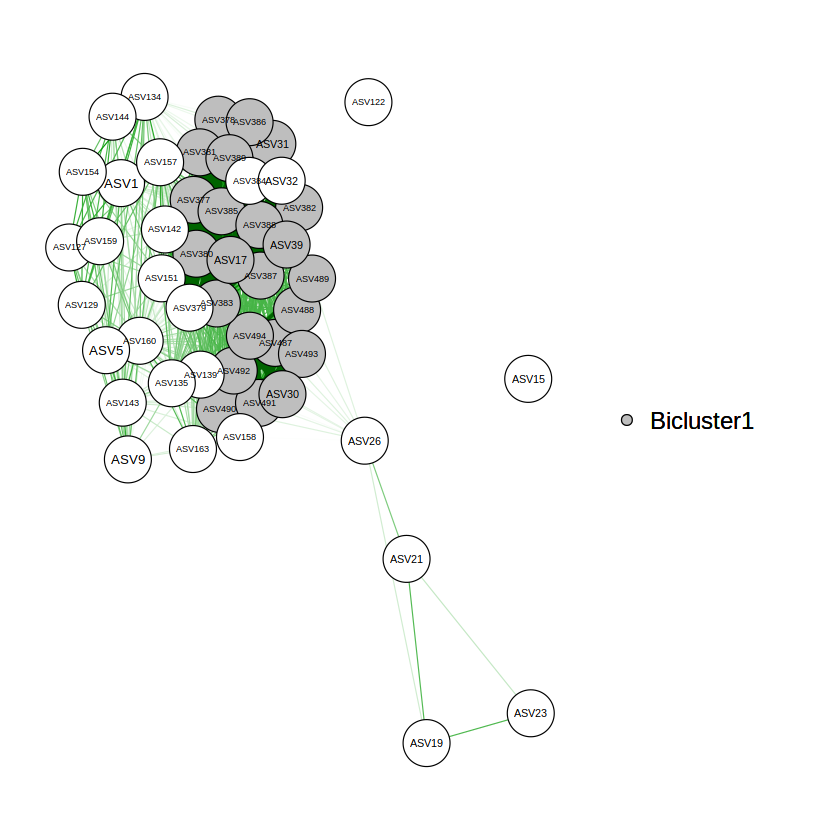

In [21]:
#Load microarray matrix
res <- biclust::biclust(my_data[1:50, ], method=BCQU(), verbose = FALSE)
# Constructing the networks for the 4th and 13th identified biclusters using the whole network as a background.
net <- qunetwork(my_data[1:50, ], res, method = 'spearman')
if (requireNamespace('qgraph'))
    qgraph::qgraph(net[[1]], groups = net[[2]], layout = 'spring', minimum = 0.6,
       color = cbind(rainbow(length(net[[2]]) - 1),'gray'))


* <h5> Consequtive Clusters

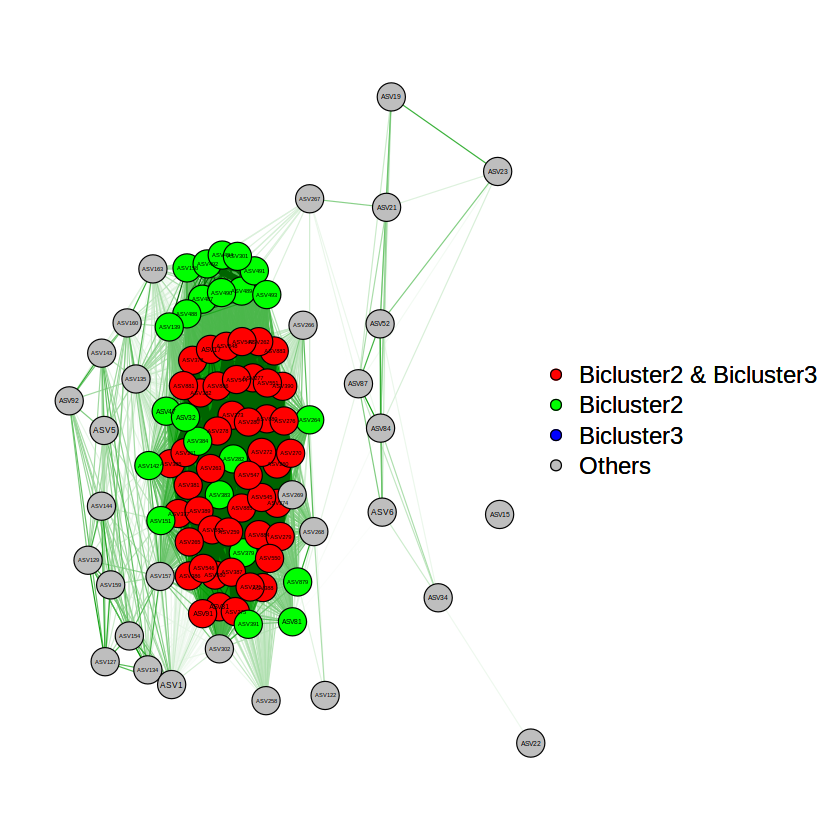

In [22]:
#Load microarray matrix
res <- biclust::biclust(my_data[1:100, ], method=BCQU(), verbose = FALSE)
# Constructing the networks for the 4th and 13th identified biclusters using the whole network as a background.
net <- qunetwork(my_data[1:100, ], res, group = c(2, 3), method = 'spearman')
if (requireNamespace('qgraph'))
    qgraph::qgraph(net[[1]], groups = net[[2]], layout = 'spring', minimum = 0.6,
       color = cbind(rainbow(length(net[[2]]) - 1),'gray'))


* <h5> Single Cluster

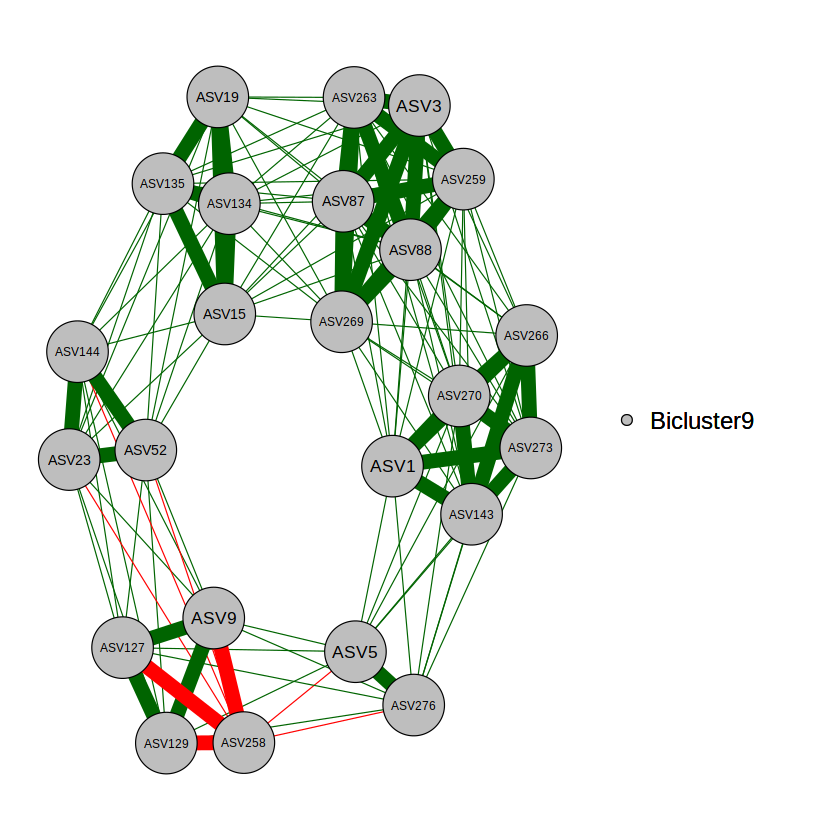

In [33]:
#Load microarray matrix
res <- biclust::biclust(my_data[1:50, ], method=BCQU(), verbose = FALSE)
# Constructing the networks for the 4th and 13th identified biclusters using the whole network as a background.
net <- qunetwork(my_data[1:100, ], res, number=9, method = 'spearman')
if (requireNamespace('qgraph'))
    qgraph::qgraph(net[[1]], groups = net[[2]], layout = 'spring', minimum = 0.6,
       color = cbind(rainbow(length(net[[2]]) - 1),'gray'))


* <h3>Report of biclusters

In [34]:
# Load microarray matrix
matrix <- my_data[1:50, ];
res1 <- biclust::biclust(matrix, method=BCQU(), verbose = FALSE)
res2 <- biclust::biclust(matrix, method=BCCC())
res3 <- biclust::biclust(matrix, method=BCBimax())
# Show the report
showinfo(matrix, c(res1, res2, res3))

1: Call and Parameter
2: number of detected biclusters
3: nrow of the first bicluster
4: ncol of the first bicluster
5: area of the first bicluster
6: ratio (nrow / ncol) of the first bicluster
7: ratio (nrow / ncol) of the matrix
8: max nrow and corresponding bicluster
9: max ncol and corresponding bicluster
10: max area and corresponding bicluster
11: union of rows, (# and %)
12: union of columns, (# and %)
13: overlap of first two biclusters (row, col, area)


1	2	3	4	5	6	7	8	9	10	11	12	13	
biclust::biclust(x = matrix, method = BCQU(), verbose = FALSE)	11	23	14	322	1.642857	0.9259259	45 4	14 1	322 1	50 100	18 33.33333	23 11 253
biclust::biclust(x = matrix, method = BCCC())	2	43	51	2193	0.8431373	0.9259259	43 1	51 1	2193 1	50 100	54 100	0 30 0
biclust::biclust(x = matrix, method = BCBimax())	92	6	2	12	3	0.9259259	7 4	10 65	21 41	16 32	25 46.2963	5 2 10
